<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Necessary-Library" data-toc-modified-id="Importing-Necessary-Library-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Necessary Library</a></span></li><li><span><a href="#Audio-Voice-to-Text-Conversion" data-toc-modified-id="Audio-Voice-to-Text-Conversion-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Audio Voice to Text Conversion</a></span></li><li><span><a href="#Splitting-the-Customer-conversation-and-Care-voice" data-toc-modified-id="Splitting-the-Customer-conversation-and-Care-voice-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Splitting the Customer conversation and Care voice</a></span></li><li><span><a href="#Loading-the-Converted-Text-Data-For-Classification" data-toc-modified-id="Loading-the-Converted-Text-Data-For-Classification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Loading the Converted Text Data For Classification</a></span></li><li><span><a href="#Number-of-Words" data-toc-modified-id="Number-of-Words-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Number of Words</a></span></li><li><span><a href="#Number-of-characters" data-toc-modified-id="Number-of-characters-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Number of characters</a></span></li><li><span><a href="#Average-Word-Length" data-toc-modified-id="Average-Word-Length-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Average Word Length</a></span></li><li><span><a href="#Number-of-stop-words" data-toc-modified-id="Number-of-stop-words-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Number of stop words</a></span></li><li><span><a href="#Number-of-special-characters" data-toc-modified-id="Number-of-special-characters-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Number of special characters</a></span></li><li><span><a href="#Number-of-numerics" data-toc-modified-id="Number-of-numerics-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Number of numerics</a></span></li><li><span><a href="#Number-of-Uppercase-words" data-toc-modified-id="Number-of-Uppercase-words-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Number of Uppercase words</a></span></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Pre-processing</a></span></li><li><span><a href="#Test-Train-Split" data-toc-modified-id="Test-Train-Split-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Test Train Split</a></span></li><li><span><a href="#Vectorizing" data-toc-modified-id="Vectorizing-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Vectorizing</a></span></li><li><span><a href="#Base-Model-Fitting" data-toc-modified-id="Base-Model-Fitting-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Base Model Fitting</a></span></li><li><span><a href="#Train-Metrics" data-toc-modified-id="Train-Metrics-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Train Metrics</a></span></li><li><span><a href="#Test-Metrics" data-toc-modified-id="Test-Metrics-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Test Metrics</a></span></li><li><span><a href="#Model-Pipe-Lining-For-New-Prediction" data-toc-modified-id="Model-Pipe-Lining-For-New-Prediction-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Model Pipe Lining For New Prediction</a></span></li><li><span><a href="#Predicting-The-New-Speech-to-Text-Data" data-toc-modified-id="Predicting-The-New-Speech-to-Text-Data-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Predicting The New Speech to Text Data</a></span></li><li><span><a href="#The-End" data-toc-modified-id="The-End-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>The End</a></span></li></ul></div>

# Importing Necessary Library 

In [1]:
import speech_recognition as sr
import os 
from pydub import AudioSegment 
from pydub.silence import split_on_silence
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import itertools
from sklearn.pipeline import Pipeline
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows
pd.options.display.max_columns
pd.set_option('display.width', 1000)

C:\Users\user\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# Audio Voice to Text Conversion

In [2]:
#AUDIO_FILE = "AUDIO-2020-05-14-14-47-49.wav"
#AUDIO_FILE = "251-118436-0000.flac"
AUDIO_FILE = "8th Street.wav"
#AUDIO_FILE = "8th Street2.wav"
# use the audio file as the audio source
r = sr.Recognizer()
with sr.AudioFile(AUDIO_FILE) as source:
    audio = r.record(source)  # read the entire audio file

print("Google Speech Recognition Says you said: \n" + r.recognize_google(audio))

Google Speech Recognition Says you said: 
hi myself Shrinath I book the hotel through hot wear at the lowest price I could fine when we got their different as manager gave us smoking room argued that I have a little baby and I would not have booked the room had I known it was smoking the manager would not hear anything and told me that hardware books the cheapest rooms are available hello myself Rachel thank you for the call I will keep you posted on the feedback shirt the corresponding team will revert back to you shortly


In [3]:
x=r.recognize_google(audio)

Creating the Data frame With Converted text 

In [4]:
df = pd.DataFrame() 

In [5]:
df = pd.DataFrame([x], columns=list('a'))

In [6]:
df

,a
0,hi myself Shrinath I book the hotel through ho...


# Splitting the Customer conversation and Care voice 

In [7]:
new= df['a'].str.split("hello", n = 2, expand=True)

In [8]:
new

,0,1
0,hi myself Shrinath I book the hotel through ho...,myself Rachel thank you for the call I will k...


In [9]:
new.rename(columns = {0 :'cust', 1:'agent'}, inplace = True)

In [10]:
new

,cust,agent
0,hi myself Shrinath I book the hotel through ho...,myself Rachel thank you for the call I will k...


In [11]:
validation=new[["cust"]]

In [12]:
validation

,cust
0,hi myself Shrinath I book the hotel through ho...


# Loading the Converted Text Data For Classification

In [13]:
train = pd.read_csv("train.csv")

In [14]:
train.Is_Response.unique()

array(['Room and Food', 'Price', 'Hotel Management', 'service',
       'Appriciation', 'Criticism'], dtype=object)

In [15]:
train.head()

,User_ID,Description,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Room and Food
1,id10327,I stayed at the Crown Plaza April -- - April -...,Room and Food
2,id10328,I booked this hotel through Hotwire at the low...,Price
3,id10329,Stayed here with husband and sons on the way t...,Hotel Management
4,id10330,My girlfriends and I stayed here to celebrate ...,service


In [16]:
train.shape

(38932, 3)

In [17]:
train.isna().sum()

User_ID        0
Description    0
Is_Response    0
dtype: int64

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 3 columns):
User_ID        38932 non-null object
Description    38932 non-null object
Is_Response    38932 non-null object
dtypes: object(3)
memory usage: 456.3+ KB


# Number of Words

In [19]:
train['word_count'] = train['Description'].apply(lambda x: len(str(x).split(" ")))
train[['Description','word_count']].head()

,Description,word_count
0,The room was kind of clean but had a VERY stro...,46
1,I stayed at the Crown Plaza April -- - April -...,208
2,I booked this hotel through Hotwire at the low...,229
3,Stayed here with husband and sons on the way t...,93
4,My girlfriends and I stayed here to celebrate ...,294


# Number of characters

In [20]:
train['char_count'] = train['Description'].str.len() ## this also includes spaces
train[['Description','char_count']].head()

,Description,char_count
0,The room was kind of clean but had a VERY stro...,248
1,I stayed at the Crown Plaza April -- - April -...,1077
2,I booked this hotel through Hotwire at the low...,1327
3,Stayed here with husband and sons on the way t...,502
4,My girlfriends and I stayed here to celebrate ...,1613


# Average Word Length

In [21]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['Description'].apply(lambda x: avg_word(x))
train[['Description','avg_word']].head()

,Description,avg_word
0,The room was kind of clean but had a VERY stro...,4.413043
1,I stayed at the Crown Plaza April -- - April -...,4.182692
2,I booked this hotel through Hotwire at the low...,4.724138
3,Stayed here with husband and sons on the way t...,4.408602
4,My girlfriends and I stayed here to celebrate ...,4.434343


# Number of stop words

In [22]:
stop = stopwords.words('english')

train['stopwords'] = train['Description'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['Description','stopwords']].head()

,Description,stopwords
0,The room was kind of clean but had a VERY stro...,23
1,I stayed at the Crown Plaza April -- - April -...,82
2,I booked this hotel through Hotwire at the low...,91
3,Stayed here with husband and sons on the way t...,36
4,My girlfriends and I stayed here to celebrate ...,127


# Number of special characters

In [23]:
train['hastags'] = train['Description'].apply(lambda x: len([x for x in x.split() if x.startswith('-')]))
train[['Description','hastags']].head()

,Description,hastags
0,The room was kind of clean but had a VERY stro...,0
1,I stayed at the Crown Plaza April -- - April -...,6
2,I booked this hotel through Hotwire at the low...,0
3,Stayed here with husband and sons on the way t...,0
4,My girlfriends and I stayed here to celebrate ...,8


# Number of numerics

In [24]:
train['numerics'] = train['Description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['Description','numerics']].head()

,Description,numerics
0,The room was kind of clean but had a VERY stro...,0
1,I stayed at the Crown Plaza April -- - April -...,0
2,I booked this hotel through Hotwire at the low...,0
3,Stayed here with husband and sons on the way t...,0
4,My girlfriends and I stayed here to celebrate ...,0


# Number of Uppercase words

In [25]:
train['upper'] = train['Description'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['Description','upper']].head()

,Description,upper
0,The room was kind of clean but had a VERY stro...,1
1,I stayed at the Crown Plaza April -- - April -...,8
2,I booked this hotel through Hotwire at the low...,9
3,Stayed here with husband and sons on the way t...,0
4,My girlfriends and I stayed here to celebrate ...,7


# Pre-processing

Lower case

In [26]:
train['Description'] = train['Description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['Description'].head()

0    the room was kind of clean but had a very stro...
1    i stayed at the crown plaza april -- - april -...
2    i booked this hotel through hotwire at the low...
3    stayed here with husband and sons on the way t...
4    my girlfriends and i stayed here to celebrate ...
Name: Description, dtype: object

Removing Punctuation

In [27]:
train['Description'] = train['Description'].str.replace('[^\w\s]','')
train['Description'].head()

0    the room was kind of clean but had a very stro...
1    i stayed at the crown plaza april   april   th...
2    i booked this hotel through hotwire at the low...
3    stayed here with husband and sons on the way t...
4    my girlfriends and i stayed here to celebrate ...
Name: Description, dtype: object

Removal of Stop Words

In [28]:
stop = stopwords.words('english')
train['Description'] = train['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['Description'].head()

0    room kind clean strong smell dogs generally av...
1    stayed crown plaza april april staff friendly ...
2    booked hotel hotwire lowest price could find g...
3    stayed husband sons way alaska cruise loved ho...
4    girlfriends stayed celebrate th birthdays plan...
Name: Description, dtype: object

Common word removal

In [29]:
freq = pd.Series(' '.join(train['Description']).split()).value_counts()[:10]

In [30]:
freq

hotel       70768
room        61407
stay        26341
great       25435
staff       24287
would       21961
rooms       20230
good        18819
one         18683
location    18361
dtype: int64

In [31]:
freq = list(freq.index)
train['Description'] = train['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['Description'].head()

0    kind clean strong smell dogs generally average...
1    stayed crown plaza april april friendly attent...
2    booked hotwire lowest price could find got fro...
3    stayed husband sons way alaska cruise loved ex...
4    girlfriends stayed celebrate th birthdays plan...
Name: Description, dtype: object

Rare words removal

In [32]:
freq = pd.Series(' '.join(train['Description']).split()).value_counts()[-10:]
freq

rality              1
morningafternoon    1
roadwould           1
whirred             1
bathroomstoilets    1
chipolte            1
tvrefridge          1
showings            1
plow                1
carluccis           1
dtype: int64

In [33]:
freq = list(freq.index)
train['Description'] = train['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['Description'].head()

0    kind clean strong smell dogs generally average...
1    stayed crown plaza april april friendly attent...
2    booked hotwire lowest price could find got fro...
3    stayed husband sons way alaska cruise loved ex...
4    girlfriends stayed celebrate th birthdays plan...
Name: Description, dtype: object

In [34]:
train.columns

Index(['User_ID', 'Description', 'Is_Response', 'word_count', 'char_count', 'avg_word', 'stopwords', 'hastags', 'numerics', 'upper'], dtype='object')

In [35]:
train.drop(columns=['word_count','avg_word','char_count','stopwords','hastags',
                           'numerics','upper'],inplace=True)

In [36]:
train.columns

Index(['User_ID', 'Description', 'Is_Response'], dtype='object')

In [37]:
data=train.copy()

In [38]:
data.head()

,User_ID,Description,Is_Response
0,id10326,kind clean strong smell dogs generally average...,Room and Food
1,id10327,stayed crown plaza april april friendly attent...,Room and Food
2,id10328,booked hotwire lowest price could find got fro...,Price
3,id10329,stayed husband sons way alaska cruise loved ex...,Hotel Management
4,id10330,girlfriends stayed celebrate th birthdays plan...,service


# Test Train Split

In [39]:
# train test split
train, test = train_test_split(data, test_size = 0.2, stratify = data['Is_Response'], random_state=21)

# get the shape of train and test split.
train.shape, test.shape

((31145, 3), (7787, 3))

# Vectorizing

In [40]:
# create a TF-IDF vectorizer object
tfidf_vectorizer = TfidfVectorizer(lowercase= True, max_features=1000, stop_words=ENGLISH_STOP_WORDS)

# fit the object with the training data tweets
tfidf_vectorizer.fit(train.Description)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}),
                strip_accents=None, sublinear_tf=False,
                token_pa

In [41]:
train_idf = tfidf_vectorizer.transform(train.Description)
test_idf  = tfidf_vectorizer.transform(test.Description)

# Base Model Fitting

In [42]:
# create the object of LinearRegression Model
model_LR = LogisticRegression()

# fit the model with the training data
model_LR.fit(train_idf, train.Is_Response)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
predict_train = model_LR.predict(train_idf)

In [44]:
predict_test = model_LR.predict(test_idf)

# Train Metrics

In [45]:
def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(train.Is_Response, predict_train,)
print("train_accuracy = %.3f, train_precision = %.3f, train_recall = %.3f, train_f1 = %.3f" % (accuracy, precision, recall, f1))

train_accuracy = 0.698, train_precision = 0.699, train_recall = 0.698, train_f1 = 0.698


Train Classification Report

In [46]:
print(classification_report(train.Is_Response, predict_train))

                  precision    recall  f1-score   support

    Appriciation       0.60      0.57      0.59      7085
       Criticism       0.68      0.72      0.70      4605
Hotel Management       0.57      0.60      0.59      8335
           Price       0.91      0.91      0.91      4722
   Room and Food       0.87      0.87      0.87      3725
         service       0.77      0.68      0.72      2673

        accuracy                           0.70     31145
       macro avg       0.73      0.73      0.73     31145
    weighted avg       0.70      0.70      0.70     31145



# Test Metrics

In [47]:
def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(test.Is_Response, predict_test)
print("test_accuracy = %.3f, test_precision = %.3f, test_recall = %.3f, test_f1 = %.3f" % (accuracy, precision, recall, f1))

test_accuracy = 0.644, test_precision = 0.647, test_recall = 0.644, test_f1 = 0.645


Test Classification Metrics

In [48]:
print(classification_report(test.Is_Response, predict_test))

                  precision    recall  f1-score   support

    Appriciation       0.52      0.49      0.51      1772
       Criticism       0.62      0.67      0.64      1151
Hotel Management       0.50      0.54      0.52      2084
           Price       0.89      0.89      0.89      1181
   Room and Food       0.88      0.84      0.86       931
         service       0.72      0.62      0.66       668

        accuracy                           0.64      7787
       macro avg       0.69      0.67      0.68      7787
    weighted avg       0.65      0.64      0.64      7787



Confusion Matrix

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=8)
    plt.yticks(tick_marks, classes, fontsize=10)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=10)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=10)
    plt.xlabel('Predicted label', fontsize=10)

    return plt

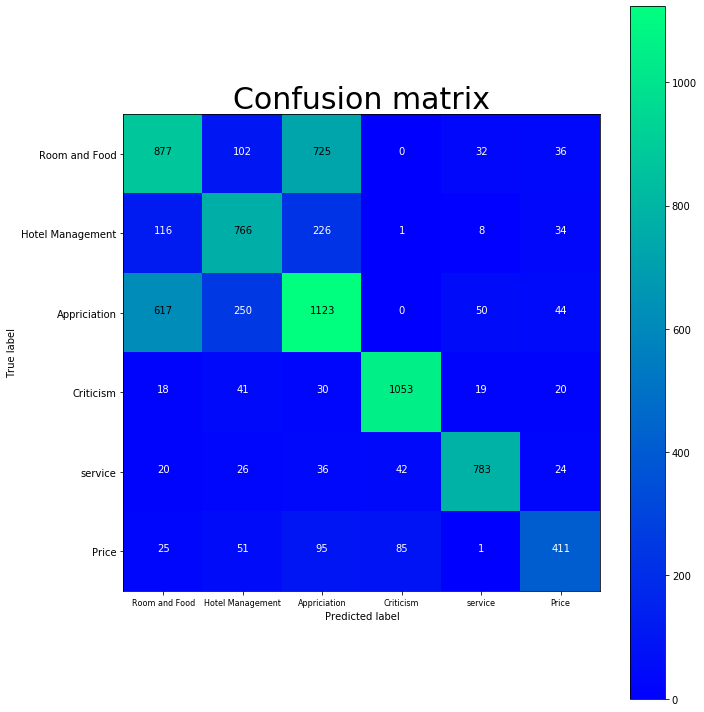

[[ 877  102  725    0   32   36]
 [ 116  766  226    1    8   34]
 [ 617  250 1123    0   50   44]
 [  18   41   30 1053   19   20]
 [  20   26   36   42  783   24]
 [  25   51   95   85    1  411]]


In [50]:
cm = confusion_matrix(test.Is_Response, predict_test)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Room and Food', 'Hotel Management', 'Appriciation', 'Criticism','service', 'Price'],
                             normalize=False, title='Confusion matrix')
plt.show()
print(cm)

# Model Pipe Lining For New Prediction

In [51]:
# define the stages of the pipeline
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(lowercase=True,
                                                      max_features=1000,
                                                      stop_words= ENGLISH_STOP_WORDS)),
                            ('model', LogisticRegression())])

# fit the pipeline model with the training data                            
pipeline.fit(train.Description, train.Is_Response)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=1000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterward...
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),


# Predicting The New Speech to Text Data

In [52]:
# sample tweet
text = validation['cust']

# predict the label using the pipeline
i=pipeline.predict(text)

In [53]:
print (text)
print (i)

0    hi myself Shrinath I book the hotel through ho...
Name: cust, dtype: object
['Price']


# The End 